In [2]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [3]:
import nltk

In [4]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [5]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize,sent_tokenize

In [15]:
para= 'This is the data science class. The class started in the month of December. it is going well.'

In [16]:
for sentence in sent_tokenize(para):
  print(sentence, word_tokenize(sentence))

This is the data science class. ['This', 'is', 'the', 'data', 'science', 'class', '.']
The class started in the month of December. ['The', 'class', 'started', 'in', 'the', 'month', 'of', 'December', '.']
it is going well. ['it', 'is', 'going', 'well', '.']


In [17]:
sent_tokenize('This is the data science class. The class started in the month of December.')

['This is the data science class.',
 'The class started in the month of December.']

In [18]:
word_tokenize('This is the data science class')

['This', 'is', 'the', 'data', 'science', 'class']

In [21]:
from google.colab import files
uploaded= files.upload()

Saving SMSSpamCollection to SMSSpamCollection


In [25]:
df= pd.read_csv('SMSSpamCollection',sep='\t',header=None,names=['labels','msg'])

In [26]:
df.head()

,labels,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
df.shape

(5572, 2)

In [28]:
df['len']= df['msg'].apply(len)

In [29]:
df

,labels,msg,len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


array([[<Axes: title={'center': 'len'}>]], dtype=object)

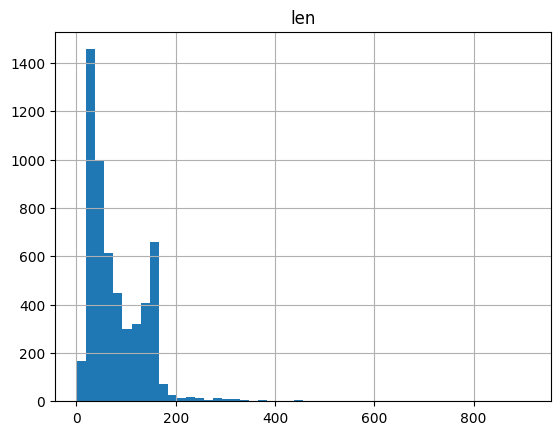

In [33]:
df.hist('len',bins=50)

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

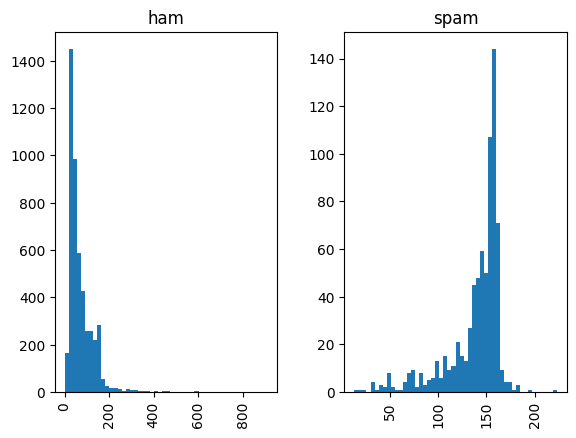

In [35]:
df.hist('len',by='labels',bins=50)

In [36]:
df['len'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: len, dtype: float64

In [38]:
df[df.len==910].iloc[0,1]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [40]:
df[df.len==100].iloc[3,1]

"That's good. Lets thank God. Please complete the drug. Have lots of water. And have a beautiful day."

In [41]:
df[df.len==910]

,labels,msg,len
1085,ham,For me the love should start with attraction.i...,910


Data Cleaning

In [42]:
sent='This is data science class((*(**%%^&^^)))'

In [47]:
import string

In [48]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [101]:
def clean_words(title):
  clean_text= [x for x in title if x not in string.punctuation]
  clean_text= ''.join(clean_text)
  clean_text= [x for x in clean_text.split() if x.lower() not in stopwords.words('english')]
  clean_text= [x for x in clean_text if not x.isdigit()]
  clean_text= [stem.stem(x) for x in clean_text]
  clean_text= [lem.lemmatize(x,pos='v') for x in clean_text ]
  clean_text= [lem.lemmatize(x,pos='n') for x in clean_text ]
  clean_text= [lem.lemmatize(x,pos='r') for x in clean_text ]
  clean_text= [lem.lemmatize(x,pos='a') for x in clean_text ]
  return clean_text

In [102]:
clean_words("aren't am having ten years of experience&&***)) and isnt going well 38888")

['arent', 'ten', 'year', 'experi', 'isnt', 'go', 'well']

In [56]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [73]:
stem= PorterStemmer()

In [84]:
stem.stem('drinking')

'drink'

In [87]:
lem= WordNetLemmatizer()

In [97]:
lem.lemmatize('lovely',pos='a')

'lovely'